<h1 style="text-align:center">
    Movies
</h1>

<br>

<font color="darkblue">

<h3 style="text-align:center">
    Hugo Gómez Sabucedo
</h3>
    
<h3 style="text-align:center">
    14 de noviembre de 2024
</h3>

<hr>

# Introducción

<br>

En este proyecto se desarrolla en Python un análisis básico de datos sobre películas de cine de IMDB.
El set de datos que vamos a usar inicialmente se encuentra en la siguiente página:

https://www.kaggle.com/datasets/carolzhangdc/imdb-5000-movie-dataset

En ella puede encontrarse información más detallada, así como una descripción precisa de cada columna.

<br>

Se plantean los apartados iniciales para su resolución *sin usar la libreria pandas*. Esto se propone así para forzar a practicar con las técnicas, herramientas y conceptos básicos de Python. Más adelante, hay otros apartados propuestos para su resolución con esta librería y otras.

<br>

<font color="darkblue">
A partir de los datos proporcionados, he conseguido realizar correctamente todos los apartados propuestos.

<br>

Aunque al final de este notebook detallaré la calificación que calculo honestamente, globalmente, siguiendo las puntuaciones que se asigna a cada apartado, diría que he obtenido una nota de 9 sobre 10.
</font>

<br>

# Datos de partida

(**Nota previa:** hasta el apartado específico de dataframes, se deben desarrollar las soluciones a los ejercicios propuestos sin usar la librería `pandas`, justamente para obligar a practicar con conceptos básicos de Python.)

Nuestra tabla de datos es el archivo de texto `movie_data.csv` que se encuentra en la carpeta `data_in`, y puede verse así con cualquier editor:

<br>

<center>
    <img src="./images/texto.png" width="100%">
</center>

La primera fila es la cabecera.
Esta fila cabecera contiene los nombres de los campos, separados por comas.
Yo la he marcado en azul para distinguirla fácilmente de las demás filas, que contienen los datos propiamente dichos,
esto es, los valores de dichos campos, consignando los datos de cada película en cada línea.

Si abrimos esta tabla con *excell* (importar datos csv con el separador `,`), vemos cada dato en una celda.

<br>

<center>
    <img src="./images/csv_1.png" width="100%">
</center>

<br>

Mostramos la hoja excell en dos imágenes por ser muy ancha.

<br>

<center>
    <img src="./images/csv_2.png" width="100%">
</center>

# Librerías y constantes globales

<br>

Pongamos todas las librerías necesarias al principio, tal como propone el estilo `pep-8`. Ej.:
<a href="https://www.python.org/dev/peps/pep-0008/">PEP 8 -- Style Guide for Python Code</a>.
    
De paso, en éste y otros lugares de Internet podrás encontrar detalles sobre estilo y presentación de código con un estilo estándar y cuidado. Examina esta página y trata de seguir esas indicaciones.

In [1]:
# Librerías:

import csv
import gc
from collections import defaultdict
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns

In [2]:
# Constantes globales:
MOVIES_DATA = './data_in/movie_data.csv'
CAMPOS_INTERES = {
    'movie_title': 11, 'title_year': 23, 'director_name': 1,
    'actor_1_name': 10, 'language': 19, 'country': 20, 'color': 0,
    'budget': 22, 'imdb_score': 25, 'movie_imdb_link': 17
}
FEW_FIELDS = "algunos_campos.txt"
CAMPOS_REDUCIDOS = ['movie_title', 'color',	'director_name', 'language',
                    'country', 'actor_1_name', 'movie_imdb_link']
OPTIONAL_DATA = './data_in/all_seasons.csv'

# Parte A. Ejercicios básicos sin usar `pandas` [2 puntos]

Esta parte inicial debe realizarse sin usar la librería `pandas`. Para practicar con esta librería, se plantean otros apartados más abajo.

### A.1. Exploración inicial básica del archivo de datos

Deseamos cargar el archivo de datos, que tiene un formato `csv`.
En este apartado, te recomiendo fuertemente usar la librería `cvs`,
que deberás importar en la primera celda del script, más arriba, no aquí.
(En los siguientes apartados, ya no mencionaré qué librerías usar
ni recordaré dónde se han de importar.)

Observa también que el test de funcionamiento te da el nombre de la función que deber definir
y algún otro identificador como es, por ejemplo, la constante `MOVIES_DATA`,
que debes definir también más arriba, en la segunda celda de este script.

Finalmente, observando el test, verás que se carga por separado la cabecera y las filas de datos.

In [3]:
def load_full_data(archivo_csv: str) -> tuple[list[str], list[list[str]]]:
    """
    Funcion que lee el archivo CSV, separa la cabecera de las filas de datos
    y devuelve ambas como una tupla.

    Parameters
    ----------
        archivo_csv : Ruta al archivo CSV desde el que se cargaran los datos.

    Returns
    ----------
        (cabecera, datos) : Una tupla con dos elementos:
        - cabecera (list) : Lista de nombres de las columnas.
        - datos (list) : Lista de listas, cada sublista es una fila de datos.
    ----------
    """

    with open(archivo_csv, encoding='utf-8') as archivo:
        lector = csv.reader(archivo)
        cabecera = next(lector) # Extraemos la primera fila como cabecera
        datos = [fila for fila in lector] # Extraemos el resto de filas
    
    return cabecera, datos

In [4]:
# Test de funcionamiento

full_header, full_list_data = load_full_data(MOVIES_DATA)

print(full_header)
print()
print(full_list_data[0:5])

['color', 'director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language', 'country', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']

[['Color', 'James Cameron', '723', '178', '0', '855', 'Joel David Moore', '1000', '760505847', 'Action|Adventure|Fantasy|Sci-Fi', 'CCH Pounder', 'Avatar\xa0', '886204', '4834', 'Wes Studi', '0', 'avatar|future|marine|native|paraplegic', 'http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1', '3054', 'English', 'USA', 'PG-13', '237000000', '2009', '936', '7.9', '1.78', '33000'], ['Color', 'Gore Verbinski', '302', '169', '563', '1000', 'Orlando Bloom', '40000', '309404152', 'Action|Adventure|F

Ahora, querríamos ver las posiciones de los identificadores de los campos, dados en la línea cabecera.

In [5]:
# Obtenemos las posiciones empleando enumerate,
# para obtener pares con el índice y el encabezado
list_of_enumerated_headers = [(ind, he) for ind, he in enumerate(full_header)]

In [6]:
# Test de funcionamiento

print(list_of_enumerated_headers)

[(0, 'color'), (1, 'director_name'), (2, 'num_critic_for_reviews'), (3, 'duration'), (4, 'director_facebook_likes'), (5, 'actor_3_facebook_likes'), (6, 'actor_2_name'), (7, 'actor_1_facebook_likes'), (8, 'gross'), (9, 'genres'), (10, 'actor_1_name'), (11, 'movie_title'), (12, 'num_voted_users'), (13, 'cast_total_facebook_likes'), (14, 'actor_3_name'), (15, 'facenumber_in_poster'), (16, 'plot_keywords'), (17, 'movie_imdb_link'), (18, 'num_user_for_reviews'), (19, 'language'), (20, 'country'), (21, 'content_rating'), (22, 'budget'), (23, 'title_year'), (24, 'actor_2_facebook_likes'), (25, 'imdb_score'), (26, 'aspect_ratio'), (27, 'movie_facebook_likes')]


### A.2. Campos principales de una película

Los campos (columnas) del archivo son demasiados. No nos interesan todos ellos. Dada una lista con todos los campos, se pide extraer otra lista sólo con los campos con los que vamos a trabajar en los siguientes apartados: `movie_title`, `title_year`, `director_name`, `actor_1_name`, `language`, `country`, `color`, `budget`, `imdb_score` y `movie_imdb_link`.

In [7]:
def main_data_from_item(lista_datos: list[str]) -> list[str]:
    """
    Función que recibe un lista de datos del archivo, y extrae de la misma los\
    campos de interés indicados en el diccionario CAMPOS_INTERES.
    
    Parameters
    ----------
        lista_datos : Lista de datos de los que extraer los campos de interés.

    Returns
    ----------
        lista : Lista con los campos de interes extraidos.
    """
    
    # Como hemos definido CAMPOS_INTERES como un diccionario, simplemente 
    # accedemos a los valores del mismo y devolvemos los campos
    return [lista_datos[ind] for ind in CAMPOS_INTERES.values()]

In [8]:
# Test de funcionamiento

print(main_data_from_item(full_header))

print()

datos_avatar_2009 = main_data_from_item(full_list_data[0])
print(datos_avatar_2009)

print()

datos_star_wars_7 = main_data_from_item(full_list_data[4])
print(datos_star_wars_7)

['movie_title', 'title_year', 'director_name', 'actor_1_name', 'language', 'country', 'color', 'budget', 'imdb_score', 'movie_imdb_link']

['Avatar\xa0', '2009', 'James Cameron', 'CCH Pounder', 'English', 'USA', 'Color', '237000000', '7.9', 'http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1']

['Star Wars: Episode VII - The Force Awakens\xa0            ', '', 'Doug Walker', 'Doug Walker', '', '', '', '', '7.1', 'http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1']


### A.3. Algunos ajustes en los campos

Observa la anomalía en el string del título de la película. También, queremos tratar algunos campos como numéricos, ya sea enteros (el año y el presupuesto) o reales (la valoración). (Algunos campos numéricos enteros están vacíos en el archivo de datos; para ellos, el valor imputado será `-1`.) Además, en las urls de las películas no necesitaremos el fragmento final, iniciado con `?ref_`.

In [9]:
def convierteNumero(valor: str, esInt: bool) -> int:
    """
    Función que recibe un string que representa un número y, en función de un\
    parámetro que determina si es entero o float, lo convierte al tipo deseado.\
    En caso de que el valor recibido no sea un número, devolverá -1.

    Parameters
    ----------
        valor : El número a convertir, que vendrá en formato string.
        esInt : Bool, es True si el número es entero, y False si es decimal.

    Returns
    ----------
        valor : El número, convertido a entero/float, según sea el caso; o -1.
    """
    
    try:
        return int(valor) if esInt else float(valor)
    except ValueError:
        return -1

def cleanTitle(titulo: str) -> str:
    """
    Función que recibe un string, representando el título de una película, y \
    le elimina los caracteres sobrantes al final.

    Parameters
    ----------
        titulo : El string que queremos limpiar.

    Returns
    ----------
        valor : El string, con los caracteres finales '\\xa0' eliminados.
    """    

    return titulo.strip().replace('\xa0', '')

def correctURL(url: str) -> str:
    """
    Función que recibe un string, representando la url en IMDB de una película\
    y la devuelve sin el fragmento final iniciado por '?ref_'.

    Parameters
    ----------
        titulo : El string con la URL que queremos limpiar.

    Returns
    ----------
        valor : El string, con los caracteres finales eliminados.
    """    

    return url.strip().split('?ref')[0]

def datatypes_arranged(lista_datos : list[str]) -> list[str]:
    """
    Función que recibe una lista con todos los datos de la película y los \
    corrige, modificando los tipos de datos de los valores numéricos y \
    limpiando el título y la url de la misma.

    Parameters
    ----------
        lista_datos : Una lista con todos los campos de datos de la película.

    Returns
    ----------
        lista_datos : La lista, pero con los valores pertinentes corregidos.
    """    

    lista_datos[0] = cleanTitle(lista_datos[0]) # Limpiamos el título
    lista_datos[1] = convierteNumero(lista_datos[1],True) # Año: int
    lista_datos[7] = convierteNumero(lista_datos[7],True) # Presupuesto: int
    lista_datos[8] = convierteNumero(lista_datos[8],False) # Puntuación: float
    lista_datos[9] = correctURL(lista_datos[9]) # Limpiamos la url

    return lista_datos


In [10]:
# Test de funcionamiento

print(datatypes_arranged(datos_avatar_2009))

print(datatypes_arranged(datos_star_wars_7))


['Avatar', 2009, 'James Cameron', 'CCH Pounder', 'English', 'USA', 'Color', 237000000, 7.9, 'http://www.imdb.com/title/tt0499549/']
['Star Wars: Episode VII - The Force Awakens', -1, 'Doug Walker', 'Doug Walker', '', '', '', -1, 7.1, 'http://www.imdb.com/title/tt5289954/']


### A.4. Recuperación de alguna información básica

<br>

Diseña funciones para recuperar la siguiente información:

<itemize>
    <li> El conjunto de valores posibles del campo `Color`.
    <li> Los títulos de película de nuestro archivo (limpios de caracteres extraños),
        junto con la cantidad de calificadores (un entero), que contengan la subcadena "Victor".
</itemize>

In [11]:
def getColores(lista_peliculas: list[list[str]]) -> set[str]:
    """
    Extrae los colores únicos de una lista de películas.

    Parameters
    ----------
        lista_peliculas : Una lista de listas de strings, donde cada lista \
        son los datos de una película, y cada sublista uno de los campos.

    Returns
    ----------
        valor : Un conjunto con los valores únicos del campo color.
    """    
    
    colores = set() 
    for movie in lista_peliculas:
        colores.add(movie[0])
    return colores

def getPelisVictor(lista_peliculas: list[list[str]]) -> list[tuple[str, int]]:
    """
    Extrae los títulos de las películas, limpios de caracteres extraños, junto\
    con los calificadores, de los títulos que contienen la subcadena "Victor".

    Parameters
    ----------
        lista_peliculas : Una lista de listas de strings, donde cada lista \
        son los datos de una película, y cada sublista uno de los campos.

    Returns
    ----------
        victors : Una lista de tuplas, donde el primer elemento es el título \
        de la película, y el segundo, el número de usuarios que la calificaron.
    """ 

    victors = list()
    for movie in lista_peliculas:
        if "Victor" in cleanTitle(movie[11]):
            victors.append((cleanTitle(movie[11]), int(movie[2])))
    
    return victors

colores = getColores(full_list_data)
pelis_victor = getPelisVictor(full_list_data)

In [12]:
# Test de funcionamiento

print(colores)
print(pelis_victor)

{'', ' Black and White', 'Color'}
[('Victor Frankenstein', 159), ('Victor Frankenstein', 159), ('The Young Victoria', 188), ('Victor Frankenstein', 159), ('Raising Victor Vargas', 59)]


# B Datos en un diccionario [2 puntos]

### B.1. Carga únicamente de datos que vamos a usar

En lugar de cargar *todos* los datos del archivo, luego generar otro archivo con los datos que nos interesan y luego ajustarlos, es mejor diseñar una función que recorre el archivo de datos y, de cada línea del archivo, *únicamente* retiene la parte que nos interesa, cargando la cabecera por un lado y, por otro, la lista de datos de interés, ajustados como ya hemos dicho.

Cargaremos esta información en un diccionario, cuyas claves serán pares `(título, año)` y cuyos valores se recogen en una lista con el resto de los campos.

Además, los datos de cada película tras la clave `(título, año)` están repetidas en el archivo de datos, con todos los datos idénticos; y lo que es peor: alguna que está repetida, pero con algún dato distinto. En ambos casos, para simplificar, adoptamos el criterio de registrar únicamente la primera aparición de los datos de una misma película y año.

In [13]:
def load_main_data(
        ruta_archivo: str
        ) -> tuple[list[str], dict[tuple[str, int], list[str]]]:
    """
    Lee el archivo CSV indicado en ruta_archivo y guarda los datos en un \
    diccionario, cuya clave es una tupla (título, año). En caso de una clave \
    duplicada, se conserva el primer registro. Devuelve este diccionario, así \
    como una lista con los encabezados de los campos.

    Parameters
    ----------
        ruta_archivo : Un string que representa la ruta al archivo CSV.

    Returns
    ----------
        list[str] : Una lista con los nombres de los campos del archivo.
        dict : Un diccionario cuya clave es una tupla (título, año) y sus \
        valores una lista de strings que representan los campos.
    """ 

    # Los campos de interés podemos extraerlos directamente de la variable
    campos_interes = list(CAMPOS_INTERES.keys()) 
    peliculas = {}
    
    with open(ruta_archivo, encoding='utf-8') as archivo:
        lector = csv.DictReader(archivo)
        for row in lector: # Leemos una línea del archivo
            # La clave sera el título, limpio; y el año, convertido a int
            key = (cleanTitle(row['movie_title']),
                   convierteNumero(row['title_year'],True))
            if key not in peliculas: # Si la película no está, la añadimos
                datos = [row[campo] for campo in campos_interes
                         if campo not in ['movie_title', 'title_year']]
                # Convertimos los tipos de los campos correspondientes
                datos[5] = convierteNumero(datos[5],True) # Presupuesto
                datos[6] = convierteNumero(datos[6],False) # Puntuación
                datos[7] = correctURL(datos[7]) # Limpiamos la url
                peliculas[key] = datos # Asignamos los valores a la clave
    
    return campos_interes, peliculas

In [14]:
# Test de funcionamiento

main_header, main_dict_data = load_main_data(MOVIES_DATA)

print(main_header)
print()
for title_year, pieces in list(main_dict_data.items())[:5]:
    print(title_year, " -> ", pieces)

['movie_title', 'title_year', 'director_name', 'actor_1_name', 'language', 'country', 'color', 'budget', 'imdb_score', 'movie_imdb_link']

('Avatar', 2009)  ->  ['James Cameron', 'CCH Pounder', 'English', 'USA', 'Color', 237000000, 7.9, 'http://www.imdb.com/title/tt0499549/']
("Pirates of the Caribbean: At World's End", 2007)  ->  ['Gore Verbinski', 'Johnny Depp', 'English', 'USA', 'Color', 300000000, 7.1, 'http://www.imdb.com/title/tt0449088/']
('Spectre', 2015)  ->  ['Sam Mendes', 'Christoph Waltz', 'English', 'UK', 'Color', 245000000, 6.8, 'http://www.imdb.com/title/tt2379713/']
('The Dark Knight Rises', 2012)  ->  ['Christopher Nolan', 'Tom Hardy', 'English', 'USA', 'Color', 250000000, 8.5, 'http://www.imdb.com/title/tt1345836/']
('Star Wars: Episode VII - The Force Awakens', -1)  ->  ['Doug Walker', 'Doug Walker', '', '', '', -1, 7.1, 'http://www.imdb.com/title/tt5289954/']


Y ahora podemos suprimir la variable `full_list_data`

In [15]:
# Eliminamos la variable y llamamos al garbage collector
del full_list_data
gc.collect()

0

In [16]:
# Test de funcionamiento

try:
    print(full_list_data)
except:
    print('La variable full_list_data está suprimida correctamente')

La variable full_list_data está suprimida correctamente


### B.2. Recuperación de alguna información 

Diseña funciones para averiguar la siguiente información:

- ¿Qué títulos de películas han sido dirigidas por "James Cameron" (o por el director que se desee)?

In [17]:
def movies_anno_for_director(
        diccionario_peliculas: dict[tuple[str, int], list[str]],
        director: str
        ) -> list[tuple[str, int]]:
    """
    Recibe un diccionario, cuya clave es una tupla (título, año) y una cadena\
    de texto que representa un director, y devuelve las peliculas (la clave\
    del diccionario) que ha dirigido ese director.

    Parameters
    ----------
        diccionario_peliculas : Un diccionario con todas las películas.
        director : Nombre del director para el que se obtendrán las películas.

    Returns
    ----------
        list[tuple[str, int]] : Una lista con las tuplas (título, año) de \
        las películas dirigidas por el director.
    """ 

    peliculas = []

    for pelicula, datos in diccionario_peliculas.items():
        if datos[0] == director:
            peliculas.append(pelicula)

    return peliculas


In [18]:
# Test de funcionamiento
    
movies_anno_for_director(main_dict_data, "James Cameron")

[('Avatar', 2009),
 ('Titanic', 1997),
 ('Terminator 2: Judgment Day', 1991),
 ('True Lies', 1994),
 ('The Abyss', 1989),
 ('Aliens', 1986),
 ('The Terminator', 1984)]

- ¿Qué directores han dirigido el número máximo de películas?

In [19]:
def directors_max_movies(
        diccionario_peliculas: dict[tuple[str, int], list[str]]
        ) -> tuple[list[str], int]:
    """
    Recibe un diccionario, cuya clave es una tupla (título, año) y halla el \
    director (o directores) que han dirigido el mayor número de películas, así\
    como dicho máximo.

    Parameters
    ----------
        diccionario_peliculas : Un diccionario con todas las películas.

    Returns
    ----------
        tuple[list[str], int] : Una tupla con una lista con el nombre del \
        director o directores, y el número máximo de películas dirigidas.
    """ 
        
    directores={}

    # En primer lugar, hallamos para todos los directores, el número de 
    # películas que han dirigido
    for pelicula in diccionario_peliculas.values():
        director = pelicula[0]
        # Si el director está en la lista, añadimos una película;
        # si no lo está, lo añadimos a la lista
        if director != '' and director in directores:
            directores[director] += 1
        else:
            directores[director] = 1

    # Obtenemos el máximo número de películas dirigidas por un mismo director
    maximo = max(directores.values()) 
    # Recorremos la lista de directores para encontrar
    # aquel(los) que coincidan con el máximo
    director = [dir for dir, count in directores.items() if count==maximo]

    return (director, maximo)

In [20]:
# Test de funcionamiento
    
print(directors_max_movies(main_dict_data))

(['Steven Spielberg'], 26)


- Para cada año de un intervalo dado de años, ¿cuántas películas se han realizado? Esta información debe recuperrase en un diccionario convencional (no por defecto), y luego debe mostrarse en una lista con los años en orden ascendente..

In [21]:
def years_num_movies(
        diccionario_peliculas: dict[tuple[str, int], list[str]],
        inicio: int, 
        fin: int
        ) -> dict[int, int]:
    """
    Recibe un diccionario, cuya clave es una tupla (título, año), un año de\
    inicio y un año de fin y devuelve un diccionario cuyas claves son los años\
    y sus valores el número de películas realizadas en ese año.

    Parameters
    ----------
        diccionario_peliculas : Un diccionario con todas las películas.
        inicio : El año de inicio del intervalo.
        fin : El año de fin del intervalo.

    Returns
    ----------
        dict[int, int] : Un diccionario cuyas claves son los años, y sus \
        valores el número de películas realizadas.
    """ 
        
    # Inicializamos el diccionario con los años en el rango (inicio, fin) y
    # el conteo de películas a 0. Al hacerlo así, garantizamos además que
    # los años salgan ordenados en orden ascendente
    anhos = {anho:0 for anho in range(inicio, fin+1)}

    # Recorremos el diccionario de películas
    for pelicula in diccionario_peliculas.keys():
        anho_pelicula = pelicula[1] # El año es el segundo parámetro
        # Si el año de la película está entre el año de inicio y el de fin
        if inicio <= anho_pelicula <= fin:
            # Incrementamos el contador de ese año en una unidad
            anhos[anho_pelicula] += 1

    return anhos

In [22]:
# Test de funcionamiento
    
num_movies = years_num_movies(main_dict_data, 2000, 2015)

print(num_movies)

{2000: 169, 2001: 183, 2002: 204, 2003: 169, 2004: 207, 2005: 216, 2006: 235, 2007: 198, 2008: 223, 2009: 253, 2010: 225, 2011: 224, 2012: 214, 2013: 231, 2014: 243, 2015: 211}


In [23]:
# Como la función diseñada ya devuelve los resultados por orden,
# simplemente la llamamos.
num_movies_sorted = years_num_movies(main_dict_data, 2000, 2015)

In [24]:
# Test de funcionamiento
    
print(num_movies_sorted)

{2000: 169, 2001: 183, 2002: 204, 2003: 169, 2004: 207, 2005: 216, 2006: 235, 2007: 198, 2008: 223, 2009: 253, 2010: 225, 2011: 224, 2012: 214, 2013: 231, 2014: 243, 2015: 211}


- Diseña también una operación que, partiendo de nuestro diccionario de los datos principales, almacene en un archivo los datos siguientes de cada película, sin la cabecera: el título, el idioma, el año, el país y el presupuesto. El separador será en este caso el carácter `|`. El archivo usado para el almacenamiento es el siguiente:

    ``` python
    FEW_FIELDS = "algunos_campos.txt"
    ```

In [25]:
def store_file(
        diccionario_peliculas: dict[tuple[str, int], list[str]],
        archivo_destino:str
        ) -> None:
    """
    Recibe un diccionario, cuya clave es una tupla (título, año), y un \
    string, que representa la ruta a un archivo, e imprime en dicho archivo \
    los campos **título**, **idioma**, **año**, **país** y **presupuesto** \
    de la película, separados por |.

    Parameters
    ----------
        diccionario_peliculas : Un diccionario con todas las películas.
        archivo_destino : La ruta al archivo donde se escribirán los datos.

    Returns
    ----------
        None
    """ 
        
    with open(archivo_destino, "w") as archivo: # Abrimos en modo escritura
        for pelicula in diccionario_peliculas.items():
            # El título y el año son la clave, el primer elemento
            titulo = pelicula[0][0] 
            anho = str(pelicula[0][1])
            # El resto de datos están en el siguiente elemento
            idioma = pelicula[1][2]
            pais = pelicula[1][3]
            presupuesto = str(pelicula[1][5])
            # Generamos la línea que escribiremos
            out = (titulo + '|' + anho + '|' + idioma + '|' + pais +
            '|' + presupuesto + '\n')

            archivo.write(out)

In [26]:
# Test de funcionamiento

store_file(main_dict_data, FEW_FIELDS)

! dir algunos*.*

print()

with open(FEW_FIELDS) as f:
    for i in range(5):
        print(f.readline())

 El volumen de la unidad C no tiene etiqueta.
 El n�mero de serie del volumen es: 98FE-7047

 Directorio de c:\Users\Hugo\OneDrive\Desktop\Entregas\EntregasMaster\01. Python

13/11/2024  22:19           210.855 algunos_campos.txt
               1 archivos        210.855 bytes
               0 dirs  488.568.512.512 bytes libres

Avatar|2009|English|USA|237000000

Pirates of the Caribbean: At World's End|2007|English|USA|300000000

Spectre|2015|English|UK|245000000

The Dark Knight Rises|2012|English|USA|250000000

Star Wars: Episode VII - The Force Awakens|-1|||-1



### B.3. Un conteo sencillo con `defaultdict`

Deseamos saber con qué directores y número de veces ha actuado cada actor como actor principal. Se pide realizar este conteo en un `defaultdict` cuyas claves serán nombres de los actores y cuyos valores tendrán la estructura de un `defaultdict`, cuyas claves serán los nombres de los directores y cuyos valores serán los núneros contabilizados.

In [27]:
def actor_directors(
        diccionario_peliculas: dict[tuple[str, int], list[str]]
        ) -> defaultdict:
    """
    Recibe un diccionario, cuya clave es una tupla (título, año) e imprime, \
    para cada actor, con qué directores ha actuado como actor principal y el \
    número de veces que lo ha hecho. Para ello, crea un defaultdict cuya \
    clave es el nombre del actor y sus valores son otro defaultdict, con las \
    claves siendo el nombre del director y los valores el conteo.

    Parameters
    ----------
        diccionario_peliculas : Un diccionario con todas las películas.

    Returns
    ----------
        actores : Un defaultdict con clave el nombre del actor y valor otro \
        defaultdict con clave el nombre del director y valor el número de \
        actuaciones.
    """ 
        
    actores = defaultdict(lambda: defaultdict(int))

    for clave, datos in diccionario_peliculas.items():
        # El primer campo (0) es el director, el segundo (1) el actor 
        actores[datos[1]][datos[0]] += 1

    return actores

In [28]:
# Test de funcionamiento

num_collaborations = actor_directors(main_dict_data)

print(type(num_collaborations))
key_a, value_a = list(num_collaborations.items())[0]
print(type(key_a), type(value_a))
key_b, value_b = list(value_a.items())[0]
print(type(key_b), type(value_b))

print()

print(num_collaborations)

<class 'collections.defaultdict'>
<class 'str'> <class 'collections.defaultdict'>
<class 'str'> <class 'int'>

defaultdict(<function actor_directors.<locals>.<lambda> at 0x00000268DFA0E5C0>, {'CCH Pounder': defaultdict(<class 'int'>, {'James Cameron': 1, 'Peter Hyams': 1, 'Fred Dekker': 1, 'Ernest R. Dickerson': 1}), 'Johnny Depp': defaultdict(<class 'int'>, {'Gore Verbinski': 5, 'Rob Marshall': 2, 'Tim Burton': 6, 'James Bobin': 1, 'Michael Mann': 1, 'Florian Henckel von Donnersmarck': 1, 'Wally Pfister': 1, 'David Koepp': 2, 'Scott Cooper': 1, 'Albert Hughes': 1, 'Roman Polanski': 1, 'Wes Craven': 1, 'Mike Newell': 1, 'Rand Ravich': 1, 'Ted Demme': 1, 'Robert Rodriguez': 1, 'Marc Forster': 1, 'Jeremy Leven': 1, 'Laurence Dunmore': 1, 'Terry Gilliam': 1, 'Lasse Hallström': 1, 'Oliver Stone': 1, 'Rachel Talalay': 1, 'Kevin Smith': 2}), 'Christoph Waltz': defaultdict(<class 'int'>, {'Sam Mendes': 1, 'David Yates': 1, 'Michel Gondry': 1, 'Tim Burton': 1}), 'Tom Hardy': defaultdict(<class

### B.4. Print seleccionado

Demasiada información. Deseamos imprimir únicamente, para cada actor, las colaboraciones que superen un mínimo, dato entrada. Si un actor no tiene ninguna colaboración que supere dicho mínimo, lógicamente no debe mostrarse.

In [29]:
def print_collaborations_min(
        conteo_colaboraciones: defaultdict, colaboraciones_minimas: int
        ) -> None:
    """
    Recibe un diccionario, cuya clave es una tupla (título, año), y un \
    número entero, que es el número mínimo de colaboraciones a considerar. \
    La función no devuelve nada, pues simplemente imprime el nombre de cada \
    actor, y una lista formada por n tuplas, con el nombre del director y el \
    número de colaboraciones de ese actor con dicho director.

    Parameters
    ----------
        conteo_colaboraciones : Un diccionario con las colaboraciones de cada \
        actor con cada director y el recuento de las mismas.
        colaboraciones_minimas : El número mínimo de colaboraciones que tiene \
        que tener el actor con el director para que se muestren.

    Returns
    ----------
        None
    """ 

    colaboraciones_por_actor = defaultdict(list)

    for director, actores in(conteo_colaboraciones.items()):
        for actor, colabs in actores.items():
            if colabs >= colaboraciones_minimas:
                colaboraciones_por_actor[actor].append((director, colabs))
    
    for actor, apariciones in colaboraciones_por_actor.items():
        print(f"{actor}  ->  {apariciones}")


In [30]:
# Test de funcionamiento

print_collaborations_min(num_collaborations, 5)

Gore Verbinski  ->  [('Johnny Depp', 5)]
Tim Burton  ->  [('Johnny Depp', 6)]
Martin Scorsese  ->  [('Leonardo DiCaprio', 5), ('Robert De Niro', 7)]
Wes Anderson  ->  [('Bill Murray', 5)]
Clint Eastwood  ->  [('Clint Eastwood', 10)]
Woody Allen  ->  [('Woody Allen', 10)]


# C. Algunos gráficos sencillos [1 punto]


### C.1 Un modelo de gráfica

Vamos a diseñar un modelo de gráfica sencillo que nos sirva para las siguientes representaciones. Tomará como parámetro una lista de pares $(x, y)$, y opcionalmente los tres rótulos explicativos que necesitamos incluir. Además, queremos que las etiquetas de las abcisas aparezcan inclinadas, para poder luego mostrar intervalos de edad.

Las pruebas de funcionamiento te darán más información que las explicaciones que pueda yo dar aquí.  

In [31]:
def representar_xxx_yyy(
        lista_puntos: list[tuple[float, float]], titulos=None
        ) -> None:
    """
    Recibe una lista de puntos (tuplas de float), y un parámetro opcional, \
    títulos, que contendrá, por orden, el título del gráfico, la etiqueta \
    del eje X y la etiqueta del eje Y, en caso de que se desee que se \
    muestren. La función mostrará un gráfico con dichos puntos.

    Parameters
    ----------
        lista_puntos : Una lista con pares (x, y) de puntos
        titulos : Contendrá los parámetros **título del gráfico**, **label del\
        eje X** y **label del eje Y**. Puede contener uno, dos, los tres o \
        ninguno. Por defecto, es igual a None.

    Returns
    ----------
        None
    """ 

    # Descomponemos lista_puntos en dos listas, una para los valores de x
    # y otra para los valores de y
    x_vals, y_vals = zip(*lista_puntos)
    plt.plot(x_vals, y_vals) # Graficamos los puntos
    plt.grid(True) # Mostramos la cuadrícula
    # Comprobamos si se ha pasado el parámetro de títulos y, en caso de que
    # se haya pasado, cuál es su longitud para ver que argumentos aplican
    if titulos:
        plt.title(titulos[0]) # Mostramos el título
        if len(titulos) == 2: # Si hay 2 parametros, ponemos label al eje X
            plt.xlabel(titulos[1]) 
        if len(titulos) == 3: # Si hay 3 parametros, ponemos label a X e Y
            plt.xlabel(titulos[1])
            plt.ylabel(titulos[2])
    plt.xticks(rotation=45, ha='right') # Para rotar los labels  del eje X
    plt.show() # Mostramos el gráfico

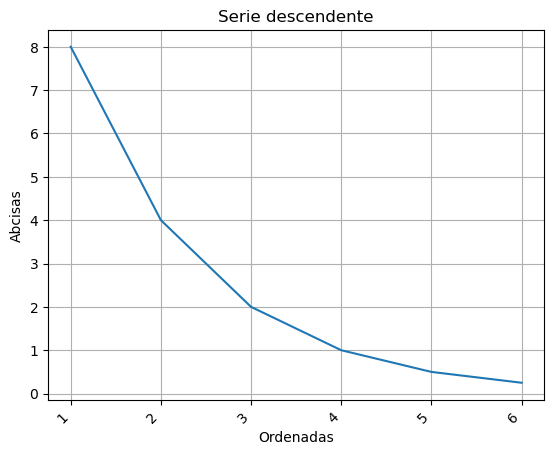

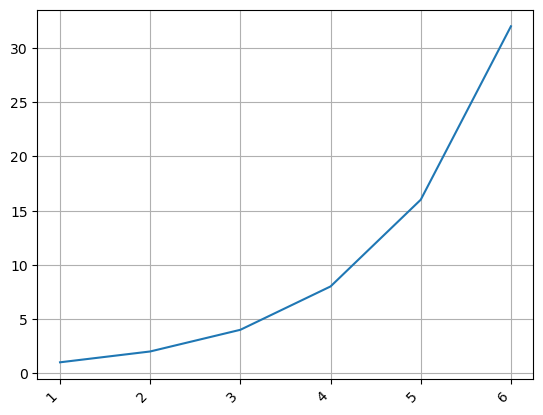

In [32]:
# Pruebas de funcionamiento:

representar_xxx_yyy([(1, 8), (2, 4), (3, 2), (4, 1), (5, 0.5), (6, 0.25)], ["Serie descendente", "Ordenadas", "Abcisas"])

representar_xxx_yyy([(1, 1), (2, 2), (3, 4), (4, 8), (5, 16), (6, 32)])

### Una gráfica concreta

Deseamos representar el número de películas de nuestra base de datos que se han producido en un intervalo de años dado.

In [33]:
def repr_movies_years(
        diccionario_peliculas: dict[tuple[str, int], list[str]],
        inicio: int,
        fin: int
        ) -> None:
    """
    Recibe un diccionario con todas las películas en una base de datos, cuya \
    clave es una tupla (título, año) y sus valores una lista de strings con \
    los diferentes campos; y dos enteros, que representan el inicio y el fin \
    del intervalo de los datos a representar. Dibuja un gráfico para dicho \
    intervalo, con el número de películas producidas en cada año.

    Parameters
    ----------
        diccionario_peliculas : Un diccionario con todas las películas.
        inicio : El inicio del intervalo de años a representar.
        fin : El fin del intervalo de años (debe ser mayor que inicio).

    Returns
    ----------
        None
    """
    
    # Obtenemos el número de películas por año con la función que creamos
    datos = years_num_movies(diccionario_peliculas, inicio, fin)
    # La función devuelve un diccionario: sus claves son los años;
    # sus valores, el recuento de películas
    anhos = list(datos.keys())
    conteo = list(datos.values())

    plt.figure(figsize=(7,4))
    plt.plot(anhos, conteo)
    plt.grid(True)
    plt.title("Number of movies in our database")
    plt.xlabel("years")
    plt.ylabel("num. movies in a year")
    plt.xticks(anhos, rotation=45, ha='right')
    plt.show()

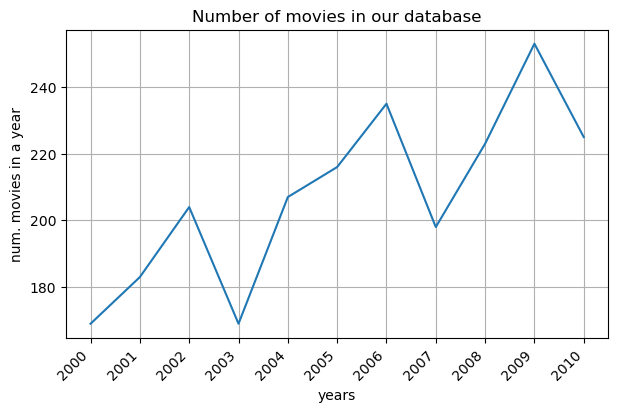

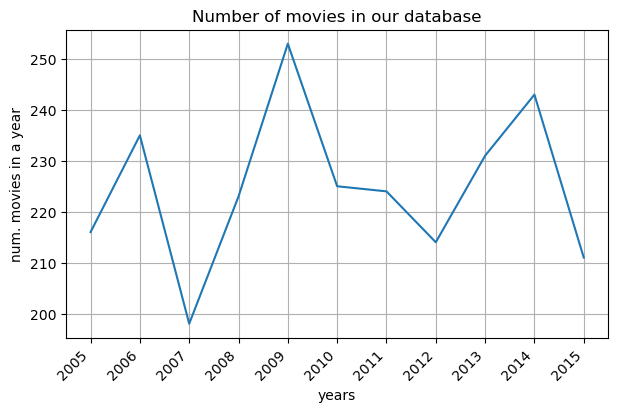

In [34]:
# Test de funcionamiento

repr_movies_years(main_dict_data, 2000, 2010)
repr_movies_years(main_dict_data, 2005, 2015)

# D. Acceso a las urls de imdb y webscraping [2 puntos]

### D.1. Recuperación de las URLs

Con sencillas instrucciones, deseamos recuperar todas las *urls* de las películas de nuestro archivo, mostrando cuántas son, la primera de ellas o las diez primeras por ejemplo:

In [35]:
# El diccionario tiene la url en los valores, en la columna octava. 
# De esta forma, obtenemos todas las urls en una lista
urls = [url[1][7] for url in main_dict_data.items()]
first_url_movie = urls[0] # La primera url es la 0
first_ten_urls = urls[:10] # Para las 10 primeras, usaremos un slice

In [36]:
# Test de funcionamiento

print(len(urls))

print()

print(first_url_movie)

print()

print(first_ten_urls)

4919

http://www.imdb.com/title/tt0499549/

['http://www.imdb.com/title/tt0499549/', 'http://www.imdb.com/title/tt0449088/', 'http://www.imdb.com/title/tt2379713/', 'http://www.imdb.com/title/tt1345836/', 'http://www.imdb.com/title/tt5289954/', 'http://www.imdb.com/title/tt0401729/', 'http://www.imdb.com/title/tt0413300/', 'http://www.imdb.com/title/tt0398286/', 'http://www.imdb.com/title/tt2395427/', 'http://www.imdb.com/title/tt0417741/']


In [37]:
# Una forma de evitar el error "Requests 403 forbidden" al hacer web scraping en las siguientes celdas:

HEADERS = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:98.0) Gecko/20100101 Firefox/98.0",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8",
        "Accept-Language": "en-US,en;q=0.9",
        "Accept-Encoding": "gzip, deflate",
        "Connection": "keep-alive",
        "Upgrade-Insecure-Requests": "1",
        "Sec-Fetch-Dest": "document",
        "Sec-Fetch-Mode": "navigate",
        "Sec-Fetch-Site": "none",
        "Sec-Fetch-User": "?1",
        "Cache-Control": "max-age=0",
    }

### D.2. Carga de la estructura sintáctica de una URL

Ahora, deseamos extraer el código `html` de una película.

In [38]:
def soup_movie(url: str) -> BeautifulSoup :
    """
    Recibe una url (en un string) y realiza una solicitud HTTP a dichar url \
    devolviendo su contenido parseado en un objeto BeautifulSoup.

    Parameters
    ----------
        url : Un string que representa una url.

    Returns
    ----------
        BeautifulSoup : El contenido HTML de la página.
    """
    
    # Hace un get a la url, con los encabezados HEADERS, y obtiene su contenido
    # mediante el .text, indicando que use el parser HTML de python
    return BeautifulSoup(requests.get(url, headers=HEADERS).text,
                         'html.parser')


In [39]:
# Test de funcionamiento

soup = soup_movie(first_url_movie)

print(str(soup)[:1000])
print()
print("... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ...")
print()
print(str(soup)[-1000:])

<!DOCTYPE html>
<html lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/"><head><meta charset="utf-8"/><meta content="width=device-width" name="viewport"/><script>if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }</script><script>window.addEventListener('load', (event) => {
        if (typeof window.csa !== 'undefined' && typeof window.csa === 'function') {
            var csaLatencyPlugin = window.csa('Content', {
                element: {
                    slotId: 'LoadTitle',
                    type: 'service-call'
                }
            });
            csaLatencyPlugin('mark', 'clickToBodyBegin', 1731532757871);
        }
    })</script><title>Avatar (2009) - IMDb</title><meta content="Avatar: Directed by James Cameron. With Sam Worthington, Zoe Saldana, Sigourney Weaver, Stephen Lang. A paraplegic Marine dispatched to the moon Pandora on a unique mission becomes torn between following his orders and pr

### D.3. Extracción de algunas piezas de información de una URL

Y ahora, con dicho código, deseamos extraer la siguiente información, referida a la película `first_url_movie`:

- La etiqueta completa del título de la película
- La descripción (sólo el contenido).
- La lista de los actores del *reparto principal*
- La información sobre el presupuesto

In [40]:
def gatherActorsFromMovie(soup: BeautifulSoup) -> list[str]:
    """
    Recibe un objeto de tipo BeautifulSoup con el contenido HTML de una url \
    de una película y devuelve una lista con todos los actores de la misma.

    Parameters
    ----------
        soup : Un objeto BeautifulSoup con el contenido HTML de una url.

    Returns
    ----------
        list[str] : Una lista con todos los actores de la película.
    """

    # Los actores están en un elemento <a>, cuyo atributo 'data-testid' toma el
    # valor 'title-cast-item__actor' (se puede comprobar visualmente en la url)
    rep = soup.find_all('a', attrs={'data-testid': 'title-cast-item__actor'})
    
    # Devolvemos el contenido del texto, en una lista
    return [actor.text for actor in rep]
    
# Mostramos la etiqueta del título
print(soup.find('title')) 
print()
# Mostramos el contenido de la descripción de la película, que está en un
# elemento <meta>, donde el atributo "name" es "description"
print(soup.find('meta', attrs={'name': 'description'})['content'])
print()
# Usamos la función definida anteriormente para mostrar los actores
print(gatherActorsFromMovie(soup))
print()
# Para el presupuesto, tenemos que encontrar el elemento <span>, y buscar el
# atributo class que cuyo valor es 'ipc-metadata-list-item__list-content-item',
# estando el presupuesto en el segundo elemento
print(soup.find_all(
    'span', attrs={'class': 'ipc-metadata-list-item__list-content-item'}
    )[2].text)

<title>Avatar (2009) - IMDb</title>

Avatar: Directed by James Cameron. With Sam Worthington, Zoe Saldana, Sigourney Weaver, Stephen Lang. A paraplegic Marine dispatched to the moon Pandora on a unique mission becomes torn between following his orders and protecting the world he feels is his home.

['Sam Worthington', 'Zoe Saldana', 'Sigourney Weaver', 'Michelle Rodriguez', 'Stephen Lang', 'Giovanni Ribisi', 'Joel David Moore', 'CCH Pounder', 'Wes Studi', 'Laz Alonso', 'Dileep Rao', 'Matt Gerald', 'Sean Anthony Moran', 'Jason Whyte', 'Scott Lawrence', 'Kelly Kilgour', 'James Patrick Pitt', 'Sean Patrick Murphy']

$237,000,000 (estimated)


### D.4. Actores que intervienen en una lista de URLs

Necesitamos crear un archivo con los actores del reparto principal de las películas de IMDB, dada la lista de sus URLs.

In [41]:
def gather_actors(archivo: str, urls: list[str]) -> None:
    """
    Recibe un string, que representa la ruta a un archivo, y una lista de \
    urls de películas, y crea un archivo con todos los actores del reparto \
    principal de dichas películas.

    Parameters
    ----------
        archivo : Una cadena de texto con la ruta al archivo donde se \
        guardarán los datos
        urls : Una lista con las urls de las películas.

    Returns
    ----------
        None
    """

    with open(archivo, 'w') as file:
        for url in urls: # Recorremos las urls
            # Hacemos la petición HTTP para acceder al contenido
            soup = BeautifulSoup(requests.get(url, headers=HEADERS).text,
                                 'html.parser')
            # Obtenemos la lista de los actores
            actores = gatherActorsFromMovie(soup)
            
            # Para cada 'actor' en la lista de actores, añadimos un salto de 
            # línea al final de cada nombre. De esta forma, cada actor saldrá
            # en una línea, y nos permite escribir todos los actores obtenidos
            # de una misma url a la vez al archivo
            actores = map(lambda actor: actor + '\n', actores)
            # Escribimos todos los actores al archivo
            file.writelines(actores)

In [42]:
# Test de funcionamiento

# OJO: esta operación puede llevar bastante tiempo.
# Para esta prueba, usamos un número limitado de películas.

gather_actors("actors_3_first_movies.txt", urls[:3])

! type actors_3_first_movies.txt

Sam Worthington
Zoe Saldana
Sigourney Weaver
Michelle Rodriguez
Stephen Lang
Giovanni Ribisi
Joel David Moore
CCH Pounder
Wes Studi
Laz Alonso
Dileep Rao
Matt Gerald
Sean Anthony Moran
Jason Whyte
Scott Lawrence
Kelly Kilgour
James Patrick Pitt
Sean Patrick Murphy
Johnny Depp
Orlando Bloom
Keira Knightley
Geoffrey Rush
Jack Davenport
Bill Nighy
Jonathan Pryce
Lee Arenberg
Mackenzie Crook
Kevin McNally
David Bailie
Stellan Skarsgård
Tom Hollander
Naomie Harris
Martin Klebba
David Schofield
Lauren Maher
Dermot Keaney
Daniel Craig
Christoph Waltz
Léa Seydoux
Ralph Fiennes
Monica Bellucci
Ben Whishaw
Naomie Harris
Dave Bautista
Andrew Scott
Rory Kinnear
Jesper Christensen
Alessandro Cremona
Stephanie Sigman
Tenoch Huerta
Adriana Paz
Domenico Fortunato
Marco Zingaro
Stefano Elfi DiClaudia


In [43]:
# La siguente llamada llevaría un tiempo realmente largo:

# import time # para cronometrar esta función, que tarda mucho

# reloj_inicio = time.time()
# gather_actors("actors_all_movies.txt", urls)
# reloj_fin = time.time()

# print("Tiempo invertido: %s segundos." % (reloj_fin - reloj_inicio))

# E. Pandas [2 puntos]

### E.1. El primer paso es la carga del archivo en un dataframe

In [44]:
def load_dataframe(archivo: str) -> pd.DataFrame:
    """
    Recibe un string, que representa la ruta a un archivo, y crea un \
    dataframe de pandas con todos los datos de dicho archivo.

    Parameters
    ----------
        archivo : Ruta al archivo desde el que se cargaran los datos.

    Returns
    ----------
        pd.DataFrame : Un dataframe en el que se han cargado todos los datos \
        del archivo
    """
    
    return pd.read_csv(archivo)


In [45]:
# Test de funcionamiento

tabla_completa = load_dataframe(MOVIES_DATA)

tabla_completa

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


### E.2. Tabla de los campos principales

A pertir de la tabla anterior, construimos otra con sólo algumos de los campos:

In [46]:
def fields_selected_dataframe(data_datos: pd.DataFrame) -> pd.DataFrame:
    """
    Recibe un dataframe de pandas y, a partir de una variable global llamada \
    "CAMPOS_REDUCIDOS", devuelve otro dataframe únicamente con esos campos.

    Parameters
    ----------
        data_datos : El dataframe completo, con todos los datos.

    Returns
    ----------
        pd.DataFrame : Un sub-dataframe con los campos de interés.
    """

    return data_datos[CAMPOS_REDUCIDOS]


In [47]:
# test de comprobación

tabla_breve = fields_selected_dataframe(tabla_completa)

tabla_breve

,movie_title,color,director_name,language,country,actor_1_name,movie_imdb_link
0,Avatar,Color,James Cameron,English,USA,CCH Pounder,http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1,Pirates of the Caribbean: At World's End,Color,Gore Verbinski,English,USA,Johnny Depp,http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2,Spectre,Color,Sam Mendes,English,UK,Christoph Waltz,http://www.imdb.com/title/tt2379713/?ref_=fn_t...
3,The Dark Knight Rises,Color,Christopher Nolan,English,USA,Tom Hardy,http://www.imdb.com/title/tt1345836/?ref_=fn_t...
4,Star Wars: Episode VII - The Force Awakens ...,NaN,Doug Walker,NaN,NaN,Doug Walker,http://www.imdb.com/title/tt5289954/?ref_=fn_t...
...,...,...,...,...,...,...,...
5038,Signed Sealed Delivered,Color,Scott Smith,English,Canada,Eric Mabius,http://www.imdb.com/title/tt3000844/?ref_=fn_t...
5039,The Following,Color,NaN,English,USA,Natalie Zea,http://www.imdb.com/title/tt2071645/?ref_=fn_t...
5040,A Plague So Pleasant,Color,Benjamin Roberds,English,USA,Eva Boehnke,http://www.imdb.com/title/tt2107644/?ref_=fn_t...
5041,Shanghai Calling,Color,Daniel Hsia,English,USA,Alan Ruck,http://www.imdb.com/title/tt2070597/?ref_=fn_t...


### E.3. Columnas de una tabla

¿Cuáles son las columnas de nuestrsa `tabla_breve`?

In [48]:
# Las columnas de un dataframe se pueden obtener mediante el atributo columns
tabla_breve.columns

Index(['movie_title', 'color', 'director_name', 'language', 'country',
       'actor_1_name', 'movie_imdb_link'],
      dtype='object')

### E.4. Campos missing

Algunos campos muestran un valod `NaN`. Deseamos cambiarlo por una cadena de caracteres: `"Desc"`.

In [49]:
# Aplicamos la función fillna de los DataFrames para completar los valores 
# NaN con la cadena "Desc"
tabla_breve = tabla_breve.fillna("Desc")

In [50]:
# Test de comprobación

tabla_breve

,movie_title,color,director_name,language,country,actor_1_name,movie_imdb_link
0,Avatar,Color,James Cameron,English,USA,CCH Pounder,http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1,Pirates of the Caribbean: At World's End,Color,Gore Verbinski,English,USA,Johnny Depp,http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2,Spectre,Color,Sam Mendes,English,UK,Christoph Waltz,http://www.imdb.com/title/tt2379713/?ref_=fn_t...
3,The Dark Knight Rises,Color,Christopher Nolan,English,USA,Tom Hardy,http://www.imdb.com/title/tt1345836/?ref_=fn_t...
4,Star Wars: Episode VII - The Force Awakens ...,Desc,Doug Walker,Desc,Desc,Doug Walker,http://www.imdb.com/title/tt5289954/?ref_=fn_t...
...,...,...,...,...,...,...,...
5038,Signed Sealed Delivered,Color,Scott Smith,English,Canada,Eric Mabius,http://www.imdb.com/title/tt3000844/?ref_=fn_t...
5039,The Following,Color,Desc,English,USA,Natalie Zea,http://www.imdb.com/title/tt2071645/?ref_=fn_t...
5040,A Plague So Pleasant,Color,Benjamin Roberds,English,USA,Eva Boehnke,http://www.imdb.com/title/tt2107644/?ref_=fn_t...
5041,Shanghai Calling,Color,Daniel Hsia,English,USA,Alan Ruck,http://www.imdb.com/title/tt2070597/?ref_=fn_t...


### E.5. Director $\rightarrow$ películas y número de películas

Función que averigua la lista de títulos de películas de un director dado:

In [51]:
def titulos_de_director_df(
                tab_df: pd.DataFrame,
                director: str
                ) -> pd.DataFrame:
    """
    Recibe un dataframe de pandas y el nombre de un director, y devuelve una \
    tabla solamente con los títulos que ha dirigido ese director.

    Parameters
    ----------
        tab_df : El dataframe completo, con todos los datos.
        director : Un string, que representa el nombre del director.

    Returns
    ----------
        pd.DataFrame : Una tabla con las películas dirigidas por 'director'.
    """

    # Devolvemos el 'movie_title' para aquellas filas en las que 
    # 'director_name' sea el nombre buscado
    return tab_df[tab_df['director_name'] == director][['movie_title']]


In [52]:
# Test de comprobación:

tabla_tits = titulos_de_director_df(tabla_breve, "James Cameron")
tabla_tits

,movie_title
0,Avatar
26,Titanic
288,Terminator 2: Judgment Day
291,True Lies
606,The Abyss
2486,Aliens
3575,The Terminator


In [53]:
list_tits = tabla_tits["movie_title"].to_list()
print(list_tits)

['Avatar\xa0', 'Titanic\xa0', 'Terminator 2: Judgment Day\xa0', 'True Lies\xa0', 'The Abyss\xa0', 'Aliens\xa0', 'The Terminator\xa0']


Deseamos saber qué directores han dirigido el máximo número de películas, junto con ese número de películas.

In [54]:
def directors_max_movies_df(
        df_peliculas: pd.DataFrame
        ) -> tuple[list[str], int]:
    """
    Recibe un dataframe de pandas y devuelve una tupla con el número máximo \
    de películas dirigidas por un director, y una lista con el director (o \
    los directores) que las han dirigido.

    Parameters
    ----------
        df_peliculas : El dataframe completo, con todos los datos.

    Returns
    ----------
        tuple[list[str], int] : Una tupla con una lista con el/los director/es\
        que han dirigido el número máximo de películas, y ese máximo
    """

    # Excluimos del dataframe original las películas con director desconocido
    directores = df_peliculas[df_peliculas['director_name'] != 'Desc']
    # Contamos cuantas veces aparece cada director en el dataframe
    directores = directores['director_name'].value_counts()
    # Obtenemos el valor máximo de dicho conteo
    max_pelis = directores.max()
    # Obtenemos una lista con el nombre del director (o directores) cuyo
    # conteo sea igual al máximo
    directores_max = directores[directores == max_pelis].index.to_list()

    return (directores_max, max_pelis)

In [55]:
# test de comprobación:

directors_max_movies_df(tabla_breve)

(['Steven Spielberg'], 26)

 # Parte F. Un cálculo masivo con map-reduce [0,5 puntos]

En este apartado se ha de realizar un programa aparte, *basado en la técnica de map-reduce*, que calcule, para cada idioma, en qué países en que se han producido películas y la suma de los presupuestos de dichas películas. Cuando el idioma o el país o el presupuesto no se conozcan, no se considerará esta película.

    C:\...> python language_budget_countries.py -q algunos_campos.txt

El programa funcionará necesariamente con la técnica map-reduce, que podemos poner en juego con la librería `mrjob`.

El funcionamiento del mismo se puede activar también desde aquí:

In [56]:
# Hagamos una llamada al programa de consola desde aquí:

! python language_budget_countries.py -q algunos_campos.txt

"Aboriginal"	[["UK", "Australia"], 86000000]
"Arabic"	[["Turkey", "Egypt", "France", "United Arab Emirates"], 11225000]
"Aramaic"	[["USA"], 30000000]
"Bosnian"	[["USA"], 13000000]
"Cantonese"	[["Hong Kong", "China"], 154500000]
"Chinese"	[["China"], 12000000]
"Czech"	[["Czech Republic"], 84450000]
"Danish"	[["Denmark"], 50100000]
"Dari"	[["USA", "Afghanistan"], 20046000]
"Dutch"	[["Netherlands"], 32150000]
"Dzongkha"	[["Australia"], 1800000]
"English"	[["USA", "UK", "New Zealand", "Canada", "Australia", "Germany", "China", "New Line", "France", "Japan", "Spain", "Hong Kong", "Czech Republic", "South Korea", "Peru", "Italy", "Aruba", "Denmark", "Libya", "Belgium", "Ireland", "South Africa", "Switzerland", "Romania", "West Germany", "Chile", "Hungary", "Russia", "Mexico", "Panama", "Greece", "Netherlands", "Official site", "Bulgaria", "Iran", "Georgia", "India", "Thailand", "Norway", "Nigeria", "Bahamas", "Iceland", "Brazil", "Poland", "Kyrgyzstan", "Philippines"], 141889675246]
"Filipin

In [57]:
# Para que el resultado se almacene en un archivo:

! python language_budget_countries.py -q algunos_campos.txt > language_countries_budgets.txt

La siguiente celda me permite ver tu programa cómodamente desde aquí.

In [58]:
def print_file(filename):
    with open(filename, "r") as f:
        for line in f:
            print(line, end="")
            
print_file("language_budget_countries.py")

import sys
from mrjob.job import MRJob
from collections import defaultdict

class MRLanguageCountriesBudgets(MRJob):
    def mapper(self, _, linea):
        titulo, anho, idioma, pais, presupuesto = linea.split('|')
        try:
            anho = int(anho)
            presupuesto = int(presupuesto)
        except:
            pass
        
        if idioma and pais and presupuesto and anho \
            and presupuesto != -1 and anho != -1:
            yield idioma, (pais, int(presupuesto))
    
    def reducer(self, idioma, values):
        pais_presupuesto = defaultdict(int)
        for pais, presupuesto in values:
            pais_presupuesto[pais] += presupuesto
        yield idioma, (list(pais_presupuesto.keys()),
                       sum(pais_presupuesto.values()))

# Para permitir la ejecucion por linea de comandos
if __name__ == '__main__':
    if len(sys.argv) != 3:
        print("El programa debe tomar 3 argumentos:")
        print("language_budget_countries.py -q archivo

# Parte G. Un apartado libre [0.5 puntos]

<br>
<font color="darkblue">
En este último apartado, se propone obtener diferentes estadísticas a partir de un archivo CSV obtenido de internet con diferentes estadísticas y datos de los jugadores de la NBA desde la temporada 1996-97 hasta la temporada 2022-23.
</font>

### G1. Estadísticas

En primer lugar, importaremos el archivo con pandas y obtendremos distintas estadísticas sencillas.
La primera tarea será obtener el promedio del peso y altura por equipo en la temporada 22-23, con dos cifras decimales, y ordenar los datos de forma descendiente por altura y peso.

In [59]:
# Guardamos el archivo como un csv,
# indicando que use la primera columna como índice
jugadores = pd.read_csv(OPTIONAL_DATA, sep=',', index_col=0)

# Obtenemos los registros sólo de la temporada actual
jugadores_actual = jugadores[jugadores['season'] == '2022-23']

# Para obtener la media, agrupamos en primer lugar por equipo, y luego 
# calculamos la media de la altura y del peso, redondeada a dos decimales
media_altura_peso = jugadores_actual.groupby('team_abbreviation')[
    ['player_height', 'player_weight']].mean().round(2)

# Ordenamos los valores por orden descendiente de altura y, en caso de
# empate, por peso
media_altura_peso.sort_values(by=['player_height', 'player_weight'],
                              ascending=False)

,player_height,player_weight
team_abbreviation,,
ORL,202.15,101.26
UTA,201.30,103.31
BOS,200.80,102.44
MIL,200.52,99.94
HOU,200.49,100.76
DEN,200.34,102.34
TOR,200.10,96.44
OKC,200.02,94.35
SAC,199.90,98.18


A continuación, analizaremos el rendimiento de los jugadores según su posición en el draft. Para ello, se considerará el rendimiento como el promedio de los puntos anotados, rebotes y asistencias.

In [72]:
jugadores_draft = jugadores
# Convertimos el 'draft_number' a string, para facilitar el trabajo
jugadores_draft['draft_number'] = jugadores_draft['draft_number'].astype(str)
# Con .loc, accedemos a las filas que cumplan la condición interna. En este
# caso, indicamos que queremos obtener, para las filas donde 'draft_number' es
# 0, ese draft_number, el cual posteriormente cambiaremos por 'Undrafted'. Esto
# es porque en el archivo se usa 0 y Undrafted para los jugadores no elegidos,
# y debemos unificarlo todo bajo la misma nomenclatura
jugadores_draft.loc[
    jugadores_draft['draft_number'] == '0', 'draft_number'
] = 'Undrafted'

# Agrupamos por draft_number y hallamos la media de puntos anotas, rebotes 
# cogidos y asistencias dadas
rend_por_pos = jugadores_draft.groupby('draft_number')[
    ['pts', 'reb', 'ast']
].mean()
# Añadimos una columna rendimiento, como el promedio de las tres anteriores
rend_por_pos['rendimiento'] = rend_por_pos.mean(axis=1).round(2)

# Imprimimos los resultados, ordenamos por rendimiento de forma descendiente
rend_por_pos[['rendimiento']].sort_values('rendimiento', ascending=False)


,rendimiento
draft_number,
1,8.87
3,7.86
2,7.03
5,6.98
4,6.94
...,...
82,1.40
79,1.03
120,1.00


Por último, se pide hallar el número total de jugadores que han jugado en la NBA provenientes de cada país, y devolver el conteo como un diccionario.

In [101]:
# Reducimos el dataframe a los jugadores y el país, y eliminamos duplicados 
jugadores_unicos = jugadores[['player_name', 'country']].drop_duplicates()
# Obtenemos una tabla con cada país, y un recuento del total de jugadores
# de ese país. Indicamos que resetee los índices de la tabla
jugadores_pais = jugadores_unicos['country'].value_counts().reset_index()
# Cambiamos el nombre de las columnas
jugadores_pais.columns = ['country', 'total_players']

# Establecemos el índice del diccionario como el país, seleccionamos la 
# columna total players y lo convertimos a diccionario
dict_jug_pais = jugadores_pais.set_index('country')['total_players'].to_dict()

print(dict_jug_pais)

{'USA': 2140, 'Canada': 45, 'France': 37, 'Australia': 22, 'Croatia': 15, 'Serbia': 15, 'Argentina': 14, 'Spain': 14, 'Germany': 13, 'Brazil': 13, 'Turkey': 12, 'Lithuania': 12, 'Nigeria': 12, 'Senegal': 10, 'Slovenia': 10, 'Russia': 9, 'Greece': 9, 'Ukraine': 8, 'Italy': 7, 'Dominican Republic': 6, 'Georgia': 6, 'Puerto Rico': 6, 'Latvia': 6, 'Montenegro': 5, 'Serbia and Montenegro': 5, 'Jamaica': 5, 'Cameroon': 4, 'Czech Republic': 4, 'Yugoslavia': 4, 'China': 4, 'Democratic Republic of the Congo': 4, 'United Kingdom': 4, 'Poland': 4, 'DRC': 3, 'Japan': 3, 'Bosnia and Herzegovina': 3, 'Bahamas': 3, 'South Sudan': 3, 'Israel': 3, 'Mexico': 3, 'Netherlands': 2, 'Congo': 2, 'Bosnia': 2, 'Sweden': 2, 'Mali': 2, 'Haiti': 2, 'Venezuela': 2, 'Switzerland': 2, 'Gabon': 2, 'New Zealand': 2, 'Finland': 2, 'England': 2, 'Saint Lucia': 1, 'Sudan': 1, 'Republic of the Congo': 1, 'Angola': 1, 'Guinea': 1, 'Trinidad and Tobago': 1, 'Denmark': 1, 'Egypt': 1, 'U.S. Virgin Islands': 1, 'Colombia': 1, 

### G2. Gráficos

En primer lugar, se propone crear un gráfico que represente un histograma de la edad de los jugadores de la temporada actual.

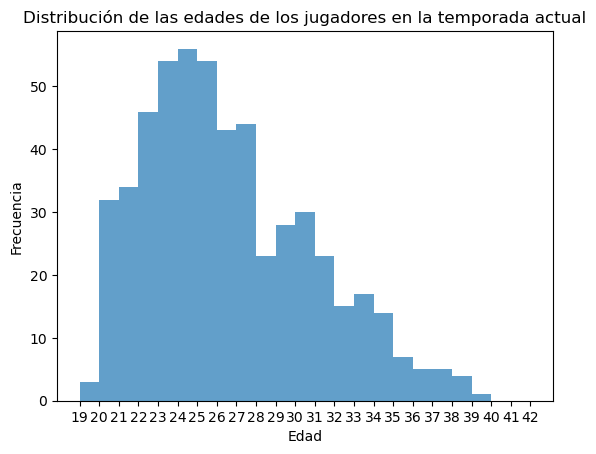

In [ ]:
# Generamos un rango desde la edad mínima hasta la máxima
rango = range(int(jugadores_actual['age'].min()),
              int(jugadores_actual['age'].max()))

# Representamos el histograma con el rango como bins
plt.hist(jugadores_actual['age'], bins=rango, alpha=0.7)
plt.title('Distribución de las edades de los jugadores en la temporada actual')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.xticks(rango)
plt.show()

El siguiente será un gráfico de puntos que relacione la posición en el draft con los puntos promedios anotados por el jugador elegido en esa posición.

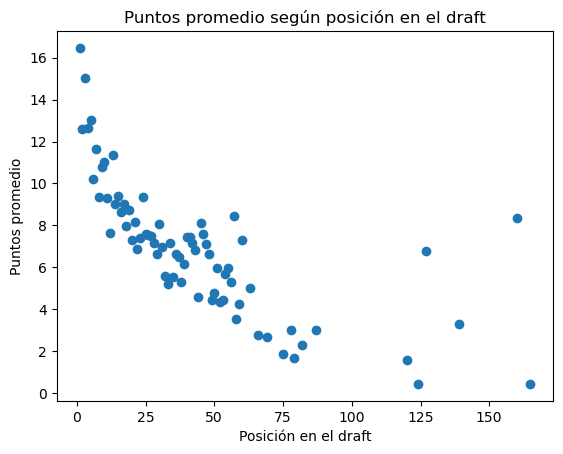

In [ ]:
# Calculamos el promedio de puntos anotados por posición en el draft
puntos_draft = (
    jugadores_draft
    .groupby('draft_number')['pts']
    .mean()
    .round(2)
    .reset_index()
)
# Excluimos a los jugadores que no obtuvieron posición en el draft
puntos_draft = puntos_draft[puntos_draft['draft_number'] != 'Undrafted']
# Convertimos de nuevo 'draft_number' a tipo int
puntos_draft['draft_number'] = pd.to_numeric(puntos_draft['draft_number'])

# Generamos el scatter plot, con el eje X como el 'draft_number' 
# y el eje Y como los puntos promedio
plt.scatter(puntos_draft['draft_number'], puntos_draft['pts'])
plt.title('Puntos promedio según posición en el draft')
plt.xlabel('Posición en el draft')
plt.ylabel('Puntos promedio')

plt.show()


A continuación, crearemos un diagrama de cajas, que nos permita analizar cómo varían las asistencias que da un jugador con la edad, para analizar sin hay algún tipo de relación. Esto nos permitirá también explorar nuevas librerías para visualización de datos que no habíamos usado anteriormente.

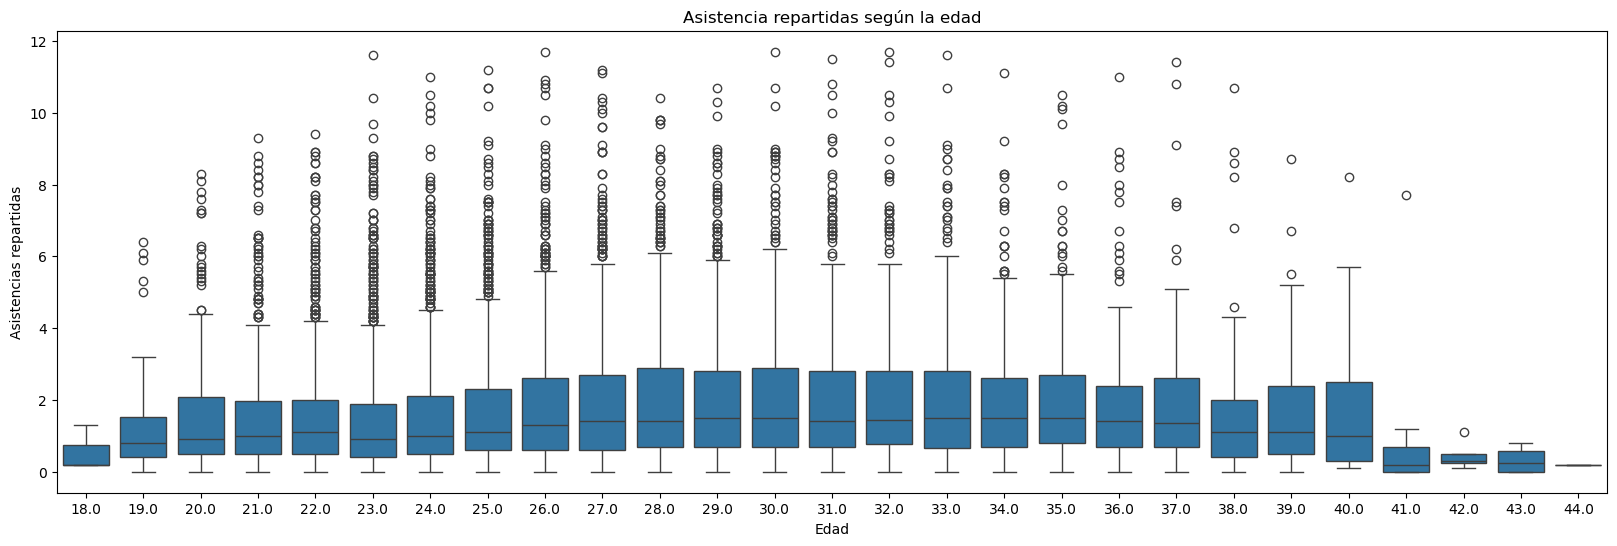

In [ ]:
plt.figure(figsize=(20,6))
# Establecemos la edad en el eje X y las asistencias repartidas en el Y,
# indicando que tome los datos del dataset jugadores
sns.boxplot(x='age', y='ast', data=jugadores)
plt.xlabel('Edad')
plt.ylabel('Asistencias repartidas')
plt.title('Asistencia repartidas según la edad')
plt.show()

Por último, para terminar de testear las funcionalidades de la librería seaborn, crearemos un heatmap para visualizar la media de puntos anotados por cada equipo en cada temporada.

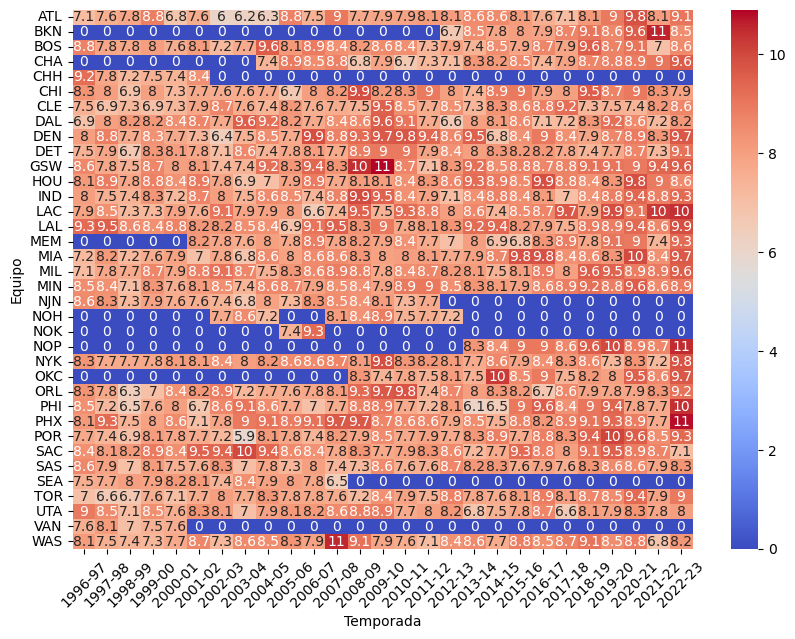

In [135]:
# Creamos una tabla con el equipo como índice, una columna por temporada
# y los valores de cada celda serán el promedio de la columna 'pts',
# rellenando con 0 los valores faltantes
media_puntos = jugadores.pivot_table(
    index='team_abbreviation',
    columns='season',
    values='pts',
    aggfunc='mean',
    fill_value=0
)

plt.figure(figsize=(10,7))
# Creamos el heatmap, mostramos los valores con annot=True, y establecemos
# el esquema de color con cmap como una escala de rojo a azul
sns.heatmap(media_puntos, annot=True, cmap='coolwarm')
plt.xlabel('Temporada')
plt.ylabel('Equipo')
plt.xticks(rotation=45)
plt.show()

### G3. Map-reduce

Como ejercicio de map-reduce, propongo calcular el MVP de cada temporada. Para ello, se asignará un peso distinto a cada una de las estadísticas, siendo del 50% los puntos anotados, un 30% los rebotes cogidos y un 20% las asistencias dadas, añadiendo el net_rating como un bonus del 10% (de forma que, si es positivo, suma; y si es negativo, resta). Este map-reduce se ejecutará desde el archivo `mvp_seasons.py`. Previamente, se habrá creado un archivo de texto con los campos de interés, que en este caso son el nombre del jugador, la temporada, su equipo y los datos estadísticos (puntos, rebotes, asistencias, rating).

In [ ]:
def generaArchivoInteres(datos_jugadores: pd.DataFrame, arch_out: str) -> None:
    """
    Recibe un dataframe de pandas y la url de una archivo de destino, y \
    extrae algunos campos de interés del dataframe y los imprime al archivo, \
    separados por comas.

    Parameters
    ----------
        datos_jugadores : El dataframe completo, con todos los datos.
        arch_out : La ruta al archivo que se creará con los datos reducidos.

    Returns
    ----------
        None
    """

    campos = ['player_name', 'season', 'team_abbreviation',
              'pts', 'reb', 'ast', 'net_rating']
    df_interes = datos_jugadores[campos] # Obtenemos los campos de interés
    
    with open(arch_out, 'w') as archivoSalida:
        # Iteramos sobre las filas del dataframe
        for indice, linea in df_interes.iterrows():
            # Concatenamos cada valor con una coma, y añadimos
            # un salto de línea al final de todos ellos
            archivoSalida.write(','.join(map(str, linea.values))+'\n')
    
    archivoSalida.close()

generaArchivoInteres(jugadores, 'datos_interes.txt')

In [137]:
! python mvp_seasons.py -q datos_interes.txt

"1996-97"	[40.786, "Michael Jordan"]
"1997-98"	[46.208, "Shaquille O'Neal"]
"1998-99"	[30.925, "Karl Malone"]
"1999-00"	[41.349, "Shaquille O'Neal"]
"2000-01"	[34.253, "Tim Duncan"]
"2001-02"	[37.432, "Shaquille O'Neal"]
"2002-03"	[36.915, "Dirk Nowitzki"]
"2003-04"	[35.231, "Kevin Garnett"]
"2004-05"	[37.433, "Tim Duncan"]
"2005-06"	[31.302, "Dwyane Wade"]
"2006-07"	[33.022, "Dirk Nowitzki"]
"2007-08"	[34.668, "Kevin Garnett"]
"2008-09"	[44.262, "LeBron James"]
"2009-10"	[39.021, "LeBron James"]
"2010-11"	[34.85, "LeBron James"]
"2011-12"	[35.521, "LeBron James"]
"2012-13"	[41.597, "LeBron James"]
"2013-14"	[34.776, "Kevin Durant"]
"2014-15"	[39.771, "Stephen Curry"]
"2015-16"	[50.968, "Stephen Curry"]
"2016-17"	[41.67, "Stephen Curry"]
"2017-18"	[39.0, "Naz Mitrou-Long"]
"2018-19"	[62.8, "RJ Hunter"]
"2019-20"	[50.673, "Giannis Antetokounmpo"]
"2020-21"	[39.578, "Joel Embiid"]
"2021-22"	[36.973, "Jayson Tatum"]
"2022-23"	[39.938, "Nikola Jokic"]


# Datos personales

<br>

<font color="darkblue">

-   **Apellidos:** Gómez Sabucedo
-   **Nombre:** Hugo
-   **Email:** hugogomezsabucedo@gmail.com
-   **Fecha:** 14 de noviembre de 2024

<br>

<font color="black">
    
### Ficha de autoevaluación

<br>

<font color="darkblue">
Creo que, en general, he conseguido resolver todos los ejercicios que se planteaban en la tarea de forma satisfactoria, obteniendo los resultados esperados. En algunos apartados, la solución a los mismos puede que no sea la más eficiente, a nivel de código, de velocidad, o no estar completamente en estilo pitónico. Es por eso que considero que, si bien el resultado general de la práctica es satisfactorio, no alcanza la nota completa.
</font>

<font color="darkblue">
    
|Apartado|Calificación|Comentario|
|-|-|-|
|a)  |**1.75** / 2.0  |Completamente resuelto |
|b)  |**1.75** / 2.0  |Completamente resuelto |
|c)  |**1.0** / 1.0  |Completamente resuelto |
|d)  |**1.75** / 2.0  |Completamente resuelto |
|e)  |**1.75** / 2.0  |Completamente resuelto |
|f)  |**0.5** / 0.5  |Completamente resuelto |
|g)  |**0.5** / 0.5  |Completamente resuelto |
|**Total** |**9.0** / 10.0|**Notable**|
</font>

<br>

<font color="black">
   
### Ayuda recibida y fuentes utilizadas
    
</font>

<br>

* Microsoft Copilot: como herramienta de apoyo y consulta
* https://peps.python.org/pep-0008/ : para consultar el estilo pep8
* https://medium.com/datable/beginners-guide-for-mapreduce-with-mrjob-in-python-dbd2e7dd0f86 : para aprender sobre el uso del mapreduce
* https://www.crummy.com/software/BeautifulSoup/bs4/doc/ : para documentación sobre BeautifulSoup
* https://www.w3schools.com/python/ : con documentación y ejemplos generales y de ejercicios de Python
* https://www.geeksforgeeks.org/python-programming-language-tutorial/ : con ejemplos de usos de Python
* https://stackoverflow.com/ : para alguna consulta o duda más concreta
* https://www.kaggle.com/datasets/justinas/nba-players-data : la fuente del dataset utilizado


<br>

In [ ]:
# Esta celda se ha de respetar: está aquí para comprobar
# el funcionamiento de algunas funciones por parte de tu profesor
